In [172]:
import networkx as nx
from datetime import datetime
import operator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import norm, ks_2samp
%matplotlib inline

In [4]:
# Read in the edge data into a pandas dataframe
df = pd.read_csv('seventh_grade_edge.csv',skiprows=2, header=None, sep=' ')
df.columns = ['student1', 'student2', 'count']
#df = df.loc[df['count'] == 3] ## This can be used to display different portions of the network by manipulating the count number

# Read the node data into a pandas dataframe
meta = pd.read_csv('seventh_grade_node.csv',header=None)
meta.index += 1
meta.columns = ['gender']

df.head(10)


,student1,student2,count
0,1,2,1
1,1,3,1
2,1,4,2
3,1,5,2
4,1,6,3
5,1,7,3
6,1,8,2
7,1,9,2
8,1,10,1
9,1,11,1


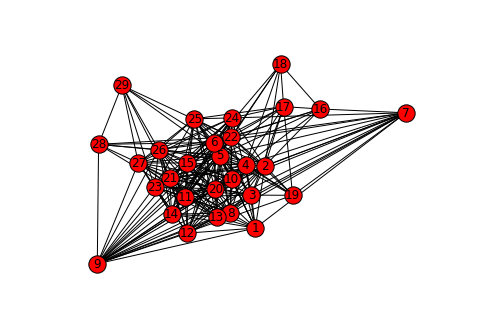

In [52]:
G = nx.Graph()

for row in df.iterrows():
    G.add_edge(row[1]['student1'], row[1]['student2'],count=row[1]['count'])

# Add node metadata
for n in G.nodes():
    G.node[n]['gender'] = meta.ix[n]['gender']

nx.draw_spring(G, with_labels = True)

# Triangles 
<p>  Trying to determine if a graph has triangles is useful especially for social networks. Triangles are 'complete graphs' within the larger graph, because they are three nodes that share three edges. Algorithms to predict and complete triangles are the basis for friend recommendation systems. </p>

In [80]:
nx.triangles(G, 1)

betweenness_centralities = nx.betweenness_centrality(G)

sorted(betweenness_centralities.items(), key=operator.itemgetter(1))


[(18, 0.00015561780267662619),
 (28, 0.0008648758648758648),
 (16, 0.0008904796486495833),
 (19, 0.0010309916939235332),
 (29, 0.0011526172240457952),
 (12, 0.0036094527165955732),
 (1, 0.003821693790181185),
 (15, 0.004645244526196907),
 (10, 0.004740528042348771),
 (17, 0.004921035365713236),
 (14, 0.005037783696747282),
 (13, 0.00659059855488427),
 (20, 0.007178392595059263),
 (25, 0.008137902273056333),
 (21, 0.008233576388338293),
 (8, 0.008319642930987468),
 (7, 0.008931740269275283),
 (23, 0.009463076217277898),
 (27, 0.011541368684225829),
 (24, 0.011642384658257673),
 (3, 0.013551179126575953),
 (26, 0.014469908009823975),
 (11, 0.014993238295059023),
 (9, 0.019681198042542584),
 (2, 0.024687141540549563),
 (4, 0.03704648893140956),
 (22, 0.03952119676326025),
 (5, 0.06891952952293755),
 (6, 0.06891952952293755)]

In [81]:
def get_triangles(G, node):
    neighbors1 = set(G.neighbors(node))
    triangle_nodes = set()
    triangle_nodes.add(node)
    """
    Fill in the rest of the code below.
    """
    for nbr1, nbr2 in combinations(neighbors1, 2):
        if G.has_edge(nbr1, nbr2):
            triangle_nodes.add(nbr1)
            triangle_nodes.add(nbr2)
    return triangle_nodes

get_triangles(G, 18)

{2, 4, 5, 6, 16, 17, 18, 22}

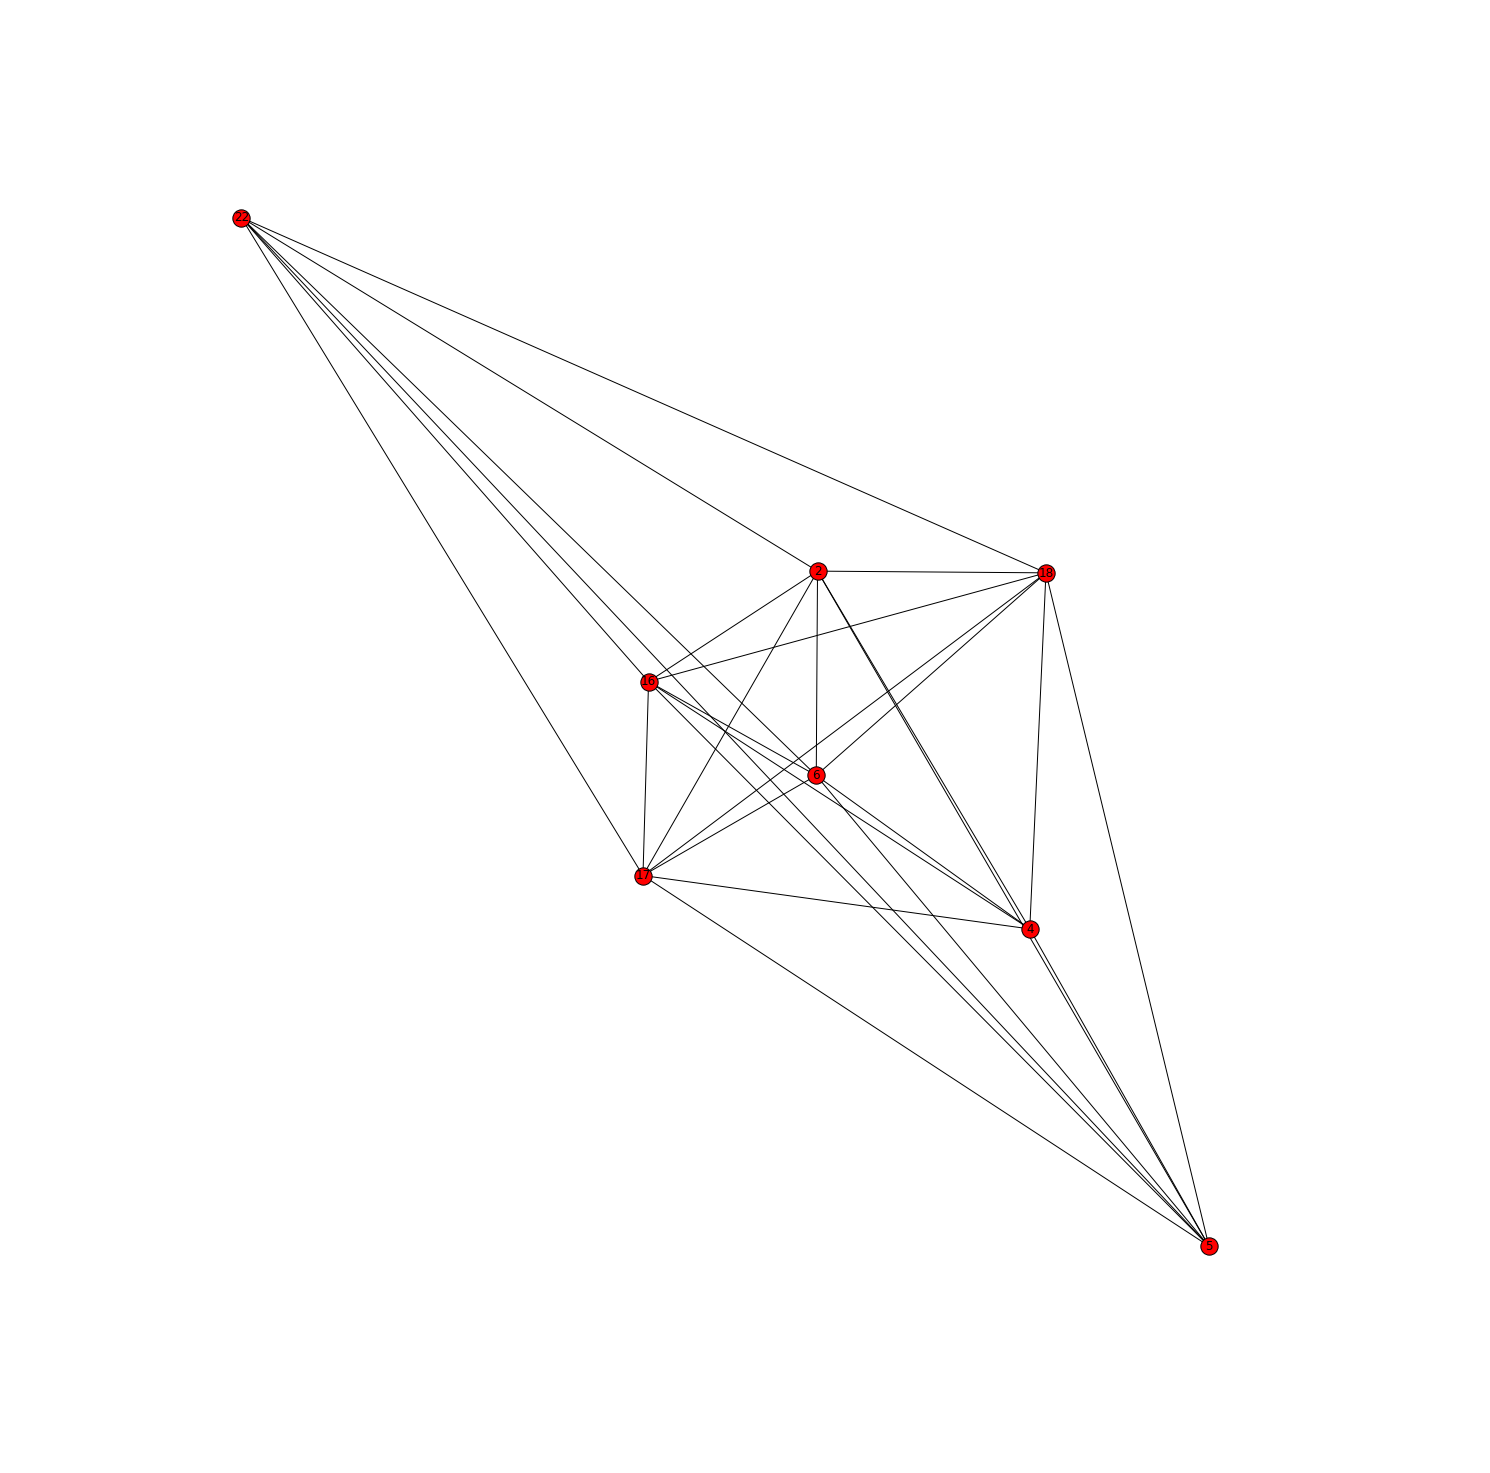

In [82]:
fig = plt.figure(figsize=(20,20))
nx.draw(G.subgraph(get_triangles(G, 18)), with_labels=True)

In [83]:
def get_open_triangles(G, node):
    """
    There are many ways to represent this. One may choose to represent
    only the nodes involved in an open triangle; this is not the 
    approach taken here.
    
    Rather, we have a code that explicitly enumrates every open triangle present.
    """
    open_triangle_nodes = []
    neighbors = set(G.neighbors(node))
    
    for n1, n2 in combinations(neighbors, 2):
        if not G.has_edge(n1, n2):
            open_triangle_nodes.append([n1, node, n2])
    
    return open_triangle_nodes

In [90]:
get_open_triangles(G, 18)

[[4, 18, 22]]

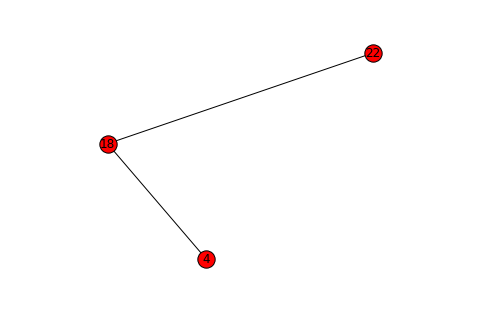

In [89]:
nodes = get_open_triangles(G, 18)
for i, triplet in enumerate(nodes):
    fig = plt.figure(i)
    nx.draw(G.subgraph(triplet), with_labels=True)

# Playing with components of the network

In [51]:
degree_centralities = nx.degree_centrality(G)
sorted_degree_cent = sorted(degree_centralities.items(), key=operator.itemgetter(1))
#plt.hist(sorted_degree_cent)
# Set the plot title. 
#plt.title('Degree Centralities')
sorted_degree_cent

[(18, 0.25),
 (16, 0.2857142857142857),
 (28, 0.2857142857142857),
 (29, 0.2857142857142857),
 (19, 0.3214285714285714),
 (17, 0.39285714285714285),
 (1, 0.5357142857142857),
 (7, 0.5357142857142857),
 (10, 0.5714285714285714),
 (12, 0.6071428571428571),
 (25, 0.6071428571428571),
 (14, 0.6428571428571428),
 (15, 0.6428571428571428),
 (21, 0.6428571428571428),
 (24, 0.6428571428571428),
 (27, 0.6428571428571428),
 (3, 0.6785714285714285),
 (13, 0.6785714285714285),
 (23, 0.6785714285714285),
 (2, 0.7142857142857142),
 (8, 0.7142857142857142),
 (20, 0.7142857142857142),
 (22, 0.7142857142857142),
 (26, 0.7142857142857142),
 (9, 0.75),
 (11, 0.7857142857142857),
 (4, 0.8214285714285714),
 (5, 1.0),
 (6, 1.0)]

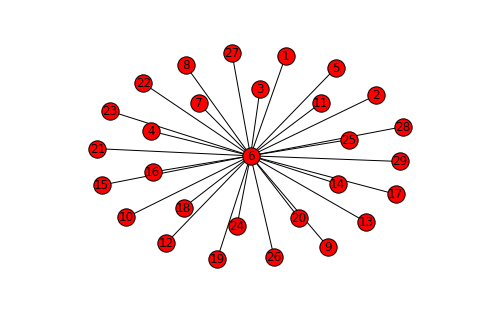

In [44]:
def extract_neighbor_edges2(G, node):
    neighbors = G.neighbors(node)
    newG = nx.Graph()
    
    for neighbor in neighbors:
        newG.add_edge(node, neighbor)

    return newG

newG = extract_neighbor_edges2(G, 6)
nx.draw(newG, with_labels=True)

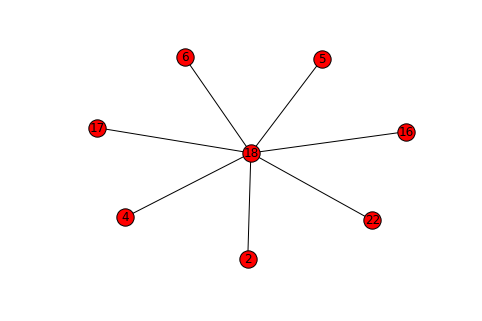

In [45]:
newG = extract_neighbor_edges2(G, 18)
nx.draw(newG, with_labels=True)

<p style= "text-align: center;"> <strong style="font-size: 32pt;">Cliques</strong></p>
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d0/VR_complex.svg" alt="Drawing" style="img-align: center; width: 400px;"/>

In [15]:
cliques = list(nx.find_cliques(G))
cliques[:10]

[[5, 6, 4, 2, 16, 17, 18],
 [5, 6, 4, 2, 16, 7],
 [5, 6, 4, 2, 3, 9, 8, 13, 11, 12, 1],
 [5, 6, 4, 2, 3, 9, 8, 13, 11, 12, 20, 21],
 [5, 6, 4, 2, 3, 9, 8, 13, 7, 1],
 [5, 6, 4, 2, 3, 9, 8, 13, 7, 20],
 [5, 6, 4, 2, 3, 9, 19, 7],
 [5, 6, 4, 2, 3, 25, 17],
 [5, 6, 4, 2, 3, 25, 11, 20, 13],
 [5, 6, 4, 2, 3, 17, 19]]

# Community Analysis

<p>First we need slightly different data that has more structured communites: <a href="http://konect.uni-koblenz.de/networks/moreno_innovation " title="Physicians network metadata">
Physicians network metadata</a>. This is a network of doctors in four towns in Illinois, Peoria, Bloomington, Quincy and Galesburg.  Nodes represent doctors, and the edges shows that the left physician said that the right physician is his friend or that he turns to the right physician if he needs advice or is interested in a discussion.</p>

In [16]:
''' Function that loads our network'''

def load_physicians_network():
    # Read the edge list

    df = pd.read_csv(
        'physicians_dataset.csv',
        sep=' ', skiprows=2, header=None)
    df = df[[0, 1]]
    df.columns = ['doctor1', 'doctor2']

    G = nx.Graph()
    for row in df.iterrows():
        G.add_edge(row[1]['doctor1'], row[1]['doctor2'])
        
    return G

In [97]:
G_phys = load_physicians_network()

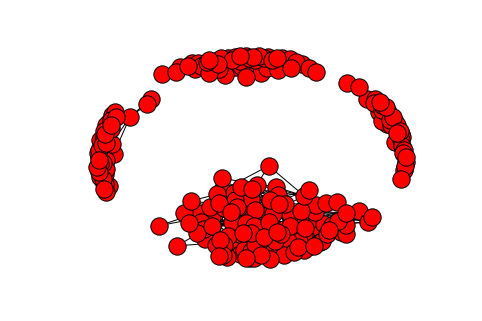

In [19]:
nx.draw(G_phys)

<p> One way to look for communities is to look for subgraphs in our larger graph.  Subgraphs are groups of nodes connected to eachother but not to nodes in other groups.</p>

In [125]:
subgraphs = list(nx.connected_component_subgraphs(G_phys))
subgraphs

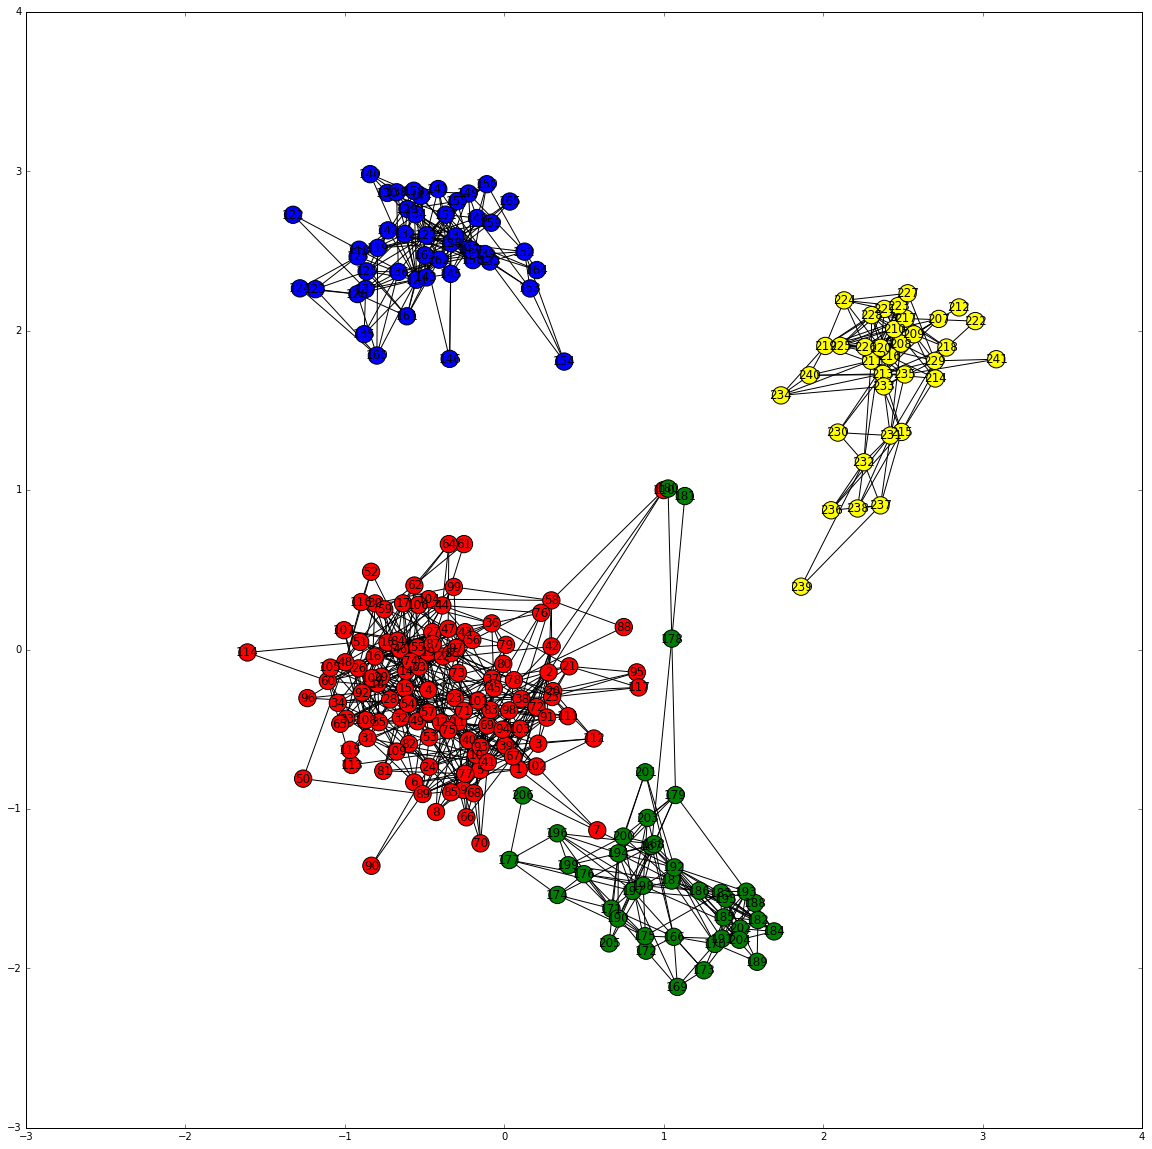

In [32]:
for i, g in enumerate(subgraphs):
    for n in g.nodes():
        G_phys.node[n]['subgraph'] = i
        
# Then, pass in a list of nodecolors that correspond to the node order.
# Feel free to change the colours around!
node_cmap = {0: 'red', 1:'blue', 2: 'green', 3:'yellow'}
nodecolor = [node_cmap[G_phys.node[n]['subgraph']] for n in sorted(G_phys.nodes())]

nodes = sorted(G_phys.nodes())
edges = G_phys.edges()
edgeprops = dict(alpha=0.1)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
initial_pos = nx.random_layout(G_phys)
initial_pos[110] = (1,1)

nx.draw_networkx(G_phys,pos=nx.spring_layout(G_phys,k = 0.19, fixed=[110],pos=initial_pos), nodelist=nodes, edgelist=edges, ax=ax, fig=fig, edgeprops=edgeprops, node_color=nodecolor)

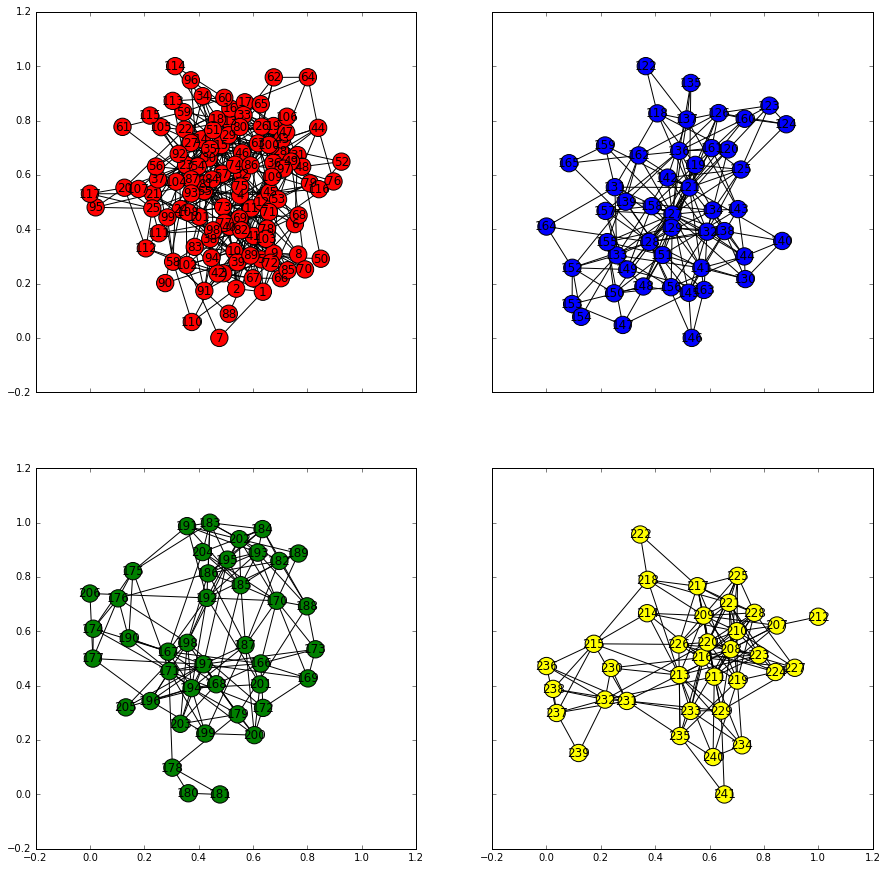

In [22]:
node_cmap = {0: 'red', 1:'blue', 2: 'green', 3:'yellow'}
pos_map = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(15,15))
for i, g in enumerate(subgraphs):
    for n in g.nodes():
        #G_phys.node[n]['subgraph'] = i
        
# Then, pass in a list of nodecolors that correspond to the node order.
# Feel free to change the colours around!
        nodecolor = [node_cmap[i] for n in sorted(g.nodes())]

        nodes = sorted(g.nodes())
        edges = g.edges()
        edgeprops = dict(alpha=0.1)


    #axes[i] = fig.add_subplot(111)

    nx.draw_networkx(g, nodelist=nodes, edgelist=edges, ax=axes[pos_map[i]], fig=fig, edgeprops=edgeprops, node_color=nodecolor)

# Connected components will not always work

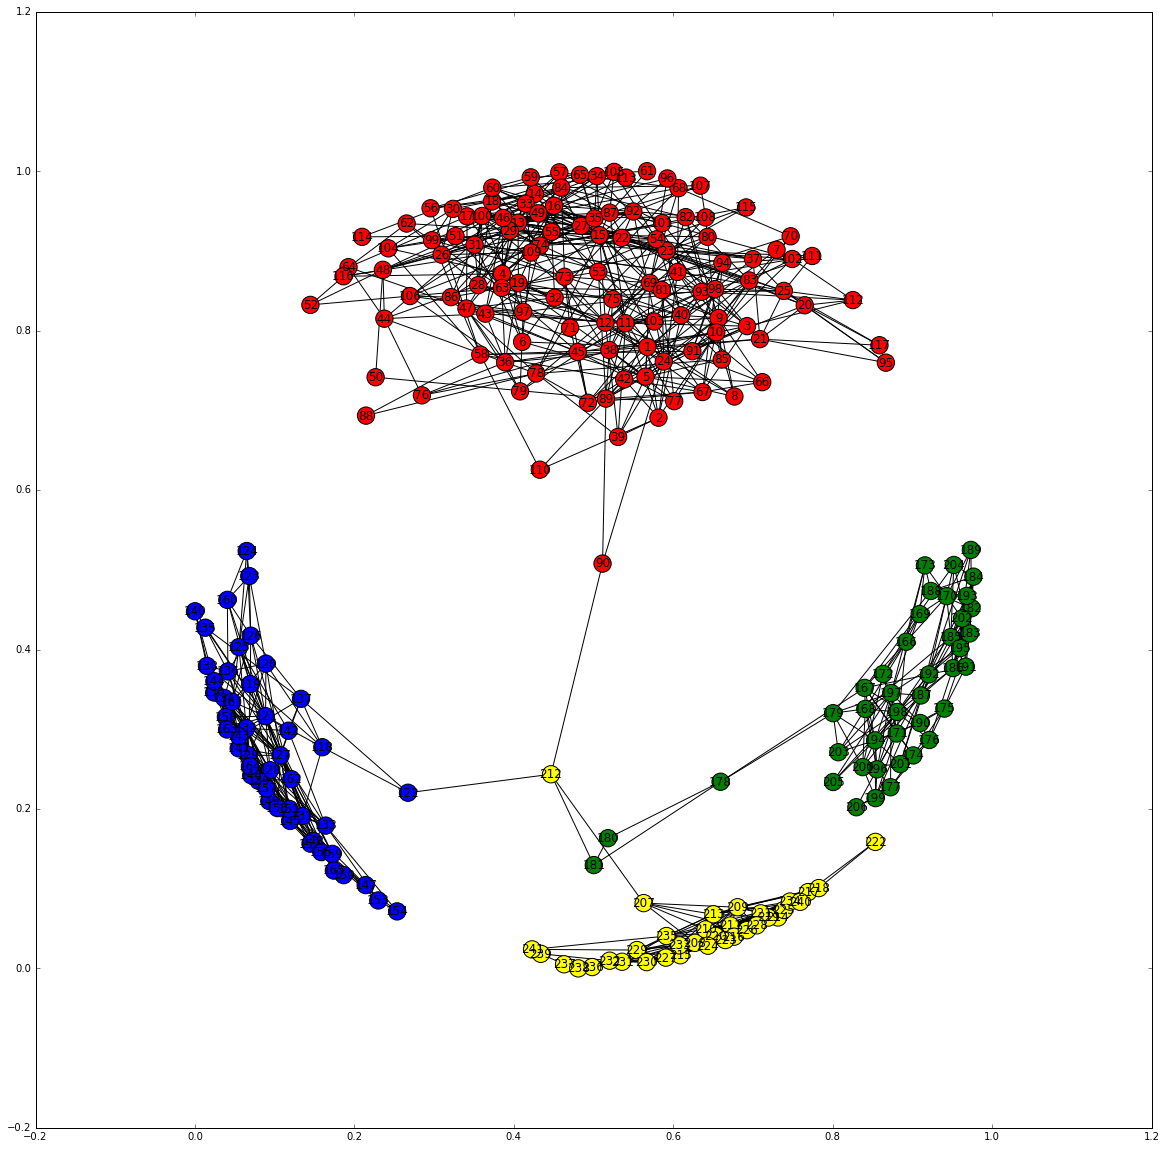

In [100]:
''' Adding connections across groups '''
G_phys_connected = nx.Graph.copy(G_phys)

G_phys_connected.add_edge(212,181)
G_phys_connected.add_edge(212,122)
G_phys_connected.add_edge(212,90)

nodes = sorted(G_phys_connected.nodes())
edges = G_phys_connected.edges()
edgeprops = dict(alpha=0.1)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
# initial_pos = nx.random_layout(G_phys)
# initial_pos[212] = (0,0)

nx.draw_networkx(G_phys_connected,pos=nx.spring_layout(G_phys_connected), nodelist=nodes, edgelist=edges, ax=ax, fig=fig, edgeprops=edgeprops, node_color=nodecolor)

In [92]:
no_subgraph = list(nx.connected_component_subgraphs(G_phys))
no_subgraph

## Use Girvan–Newman algoritum to find communities in more connected networks

# Statistically comparing networks
<p> Let's compare the subgraphs from the connected components of the doctor network.  Are they similar to a random graph model such as Watts-Strogatz small world model?</p>

{0: [0.0011875948375536783],
 1: [0.0096189515114933864],
 2: [0.00528628792385485],
 3: [0.012035873172798533]}

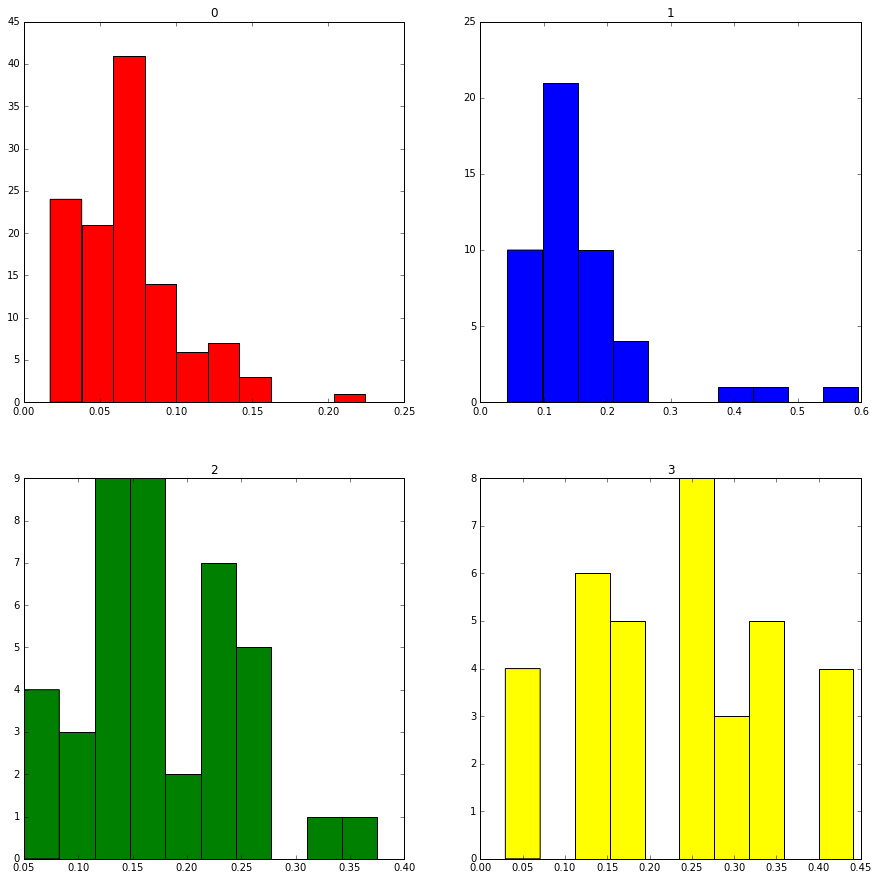

In [155]:
'''
Generate node centralities, centralities variance for the 4 subplots, and plot histograms of the centralities
'''
node_cmap = {0: 'red', 1:'blue', 2: 'green', 3:'yellow'}
pos_map = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
var_dict = {0: [], 1: [], 2: [], 3:[]}
for i, g in enumerate(subgraphs):
    sub_cent = nx.degree_centrality(g).values()
    var = (np.var(sub_cent))
    var_dict[i].append(var)
    axes[pos_map[i]].hist(sub_cent, color = node_cmap[i])
    axes[pos_map[i]].set_title(i)
var_dict

[(0, Ks_2sampResult(statistic=0.82051282051282048, pvalue=7.5743794275986937e-36)), (1, Ks_2sampResult(statistic=0.77083333333333326, pvalue=1.5267384140480727e-13)), (2, Ks_2sampResult(statistic=0.85365853658536583, pvalue=3.0543035602155059e-14)), (3, Ks_2sampResult(statistic=0.82857142857142851, pvalue=1.327117367337274e-11))]


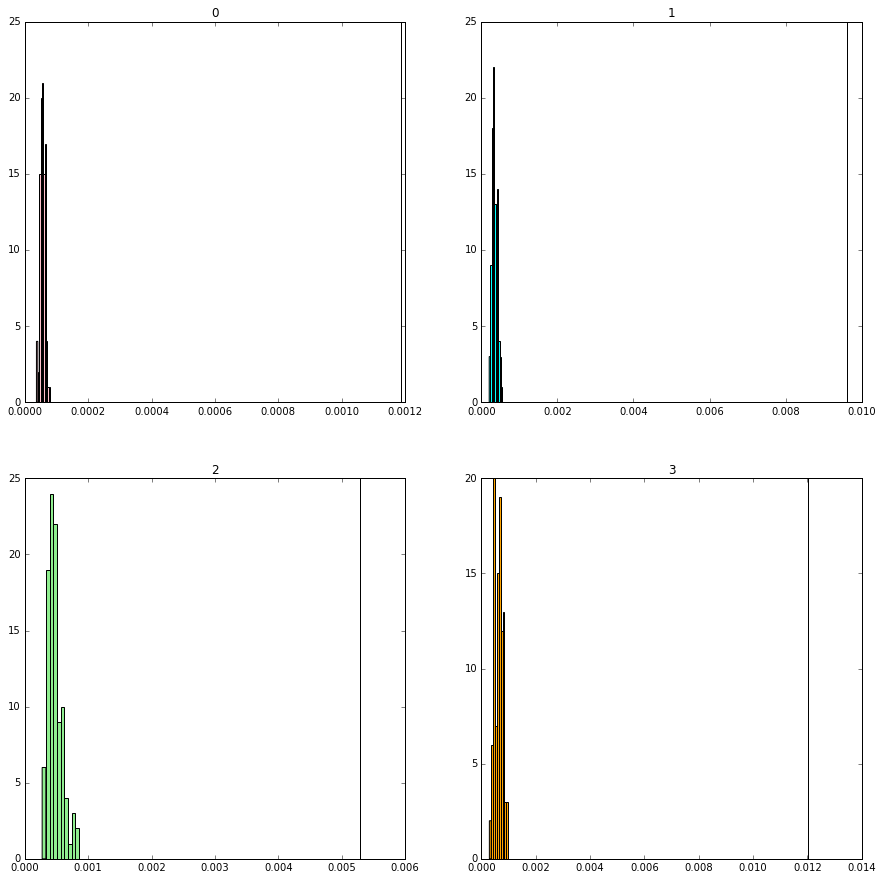

In [204]:
'''
Generate random graphs using Watts-Strogatz distribution for subgraphs and graph variance from random graphs
'''
node_cmap = {0: 'pink', 1:'cyan', 2: 'lightgreen', 3:'orange'}
pos_map = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
n_sims = 100

var_rand = {0: [], 1: [], 2: [], 3:[]}
ks_lst = []
for i, g in enumerate(subgraphs):
    for x in range(n_sims):
        nodes = g.nodes()
        n = len(nodes)
        rand_g = nx.watts_strogatz_graph(n, 2, 0.5) 
        sub_cent_rand = nx.degree_centrality(rand_g).values()
        sub_cent = nx.degree_centrality(g).values()
        var_rand[i].append(np.var(sub_cent_rand))
        
    ks = ks_2samp(sub_cent_rand, sub_cent) #use nodes from last random graph to compute ks statistic
    ks_lst.append((i,ks))
        
    axes2[pos_map[i]].hist((var_rand[i]), color = node_cmap[i]) #histogram of variances from 100 random graphs
    axes2[pos_map[i]].axvline(var_dict[i], color='k', linestyle='solid')
    axes2[pos_map[i]].set_title(i)
print (ks_lst)